# Kmeans

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)



In [3]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Hopkins Test

In [6]:
!pip install pyclustertend

Defaulting to user installation because normal site-packages is not writeable


In [15]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [16]:
hopkins(df,df.shape[0])

0.4337187543586679

In [17]:
hopkins(scale(df),df.shape[0])

0.36194971346565524

# Kmeans Model

In [19]:
k_means = KMeans(n_clusters = 2).fit(df)

In [20]:
clusters = k_means.labels_

In [21]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

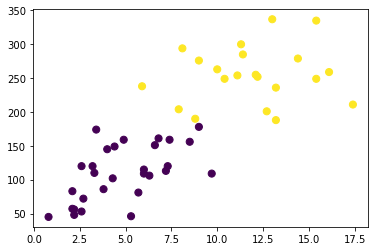

In [22]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [23]:
centroids = k_means.cluster_centers_

In [24]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

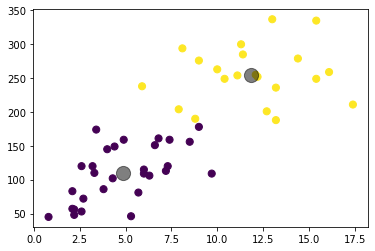

In [25]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

# Elbow Method

In [52]:
ssd = []

K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'Inertia')

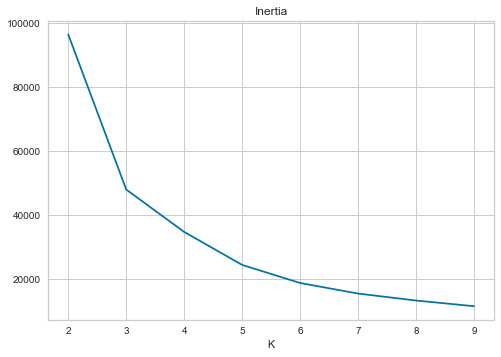

In [53]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

In [54]:
from yellowbrick.cluster import KElbowVisualizer

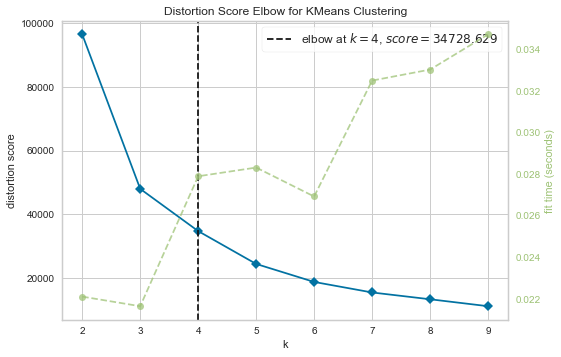

In [55]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df)
visu.poof()

In [32]:
kmeans = KMeans(n_clusters = 4).fit(df)

In [33]:
labels = kmeans.labels_

In [34]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [35]:
df["cluster_id"] = labels

In [36]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


# Silhouette Score

In [37]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [38]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5017569886048432


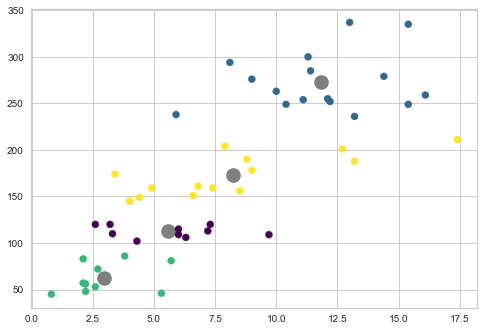

In [39]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

# ARI Score


In [56]:
new_df = df.sample(15)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
Ohio,7.3,120,75,21.4,0
Maryland,11.3,300,67,27.8,1
Wisconsin,2.6,53,66,10.8,2
Indiana,7.2,113,65,21.0,0
Utah,3.2,120,80,22.9,0
South Dakota,3.8,86,45,12.8,2
Colorado,7.9,204,78,38.7,3
Mississippi,16.1,259,44,17.1,1
Arkansas,8.8,190,50,19.5,3
Texas,12.7,201,80,25.5,3


In [70]:
new_df["true_label"] = [0,1,2,0,0,0,3,1,1,3,3,2,1,1,1]

In [71]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
Ohio,7.3,120,75,21.4,0,0
Maryland,11.3,300,67,27.8,1,1
Wisconsin,2.6,53,66,10.8,2,2
Indiana,7.2,113,65,21.0,0,0
Utah,3.2,120,80,22.9,0,0
South Dakota,3.8,86,45,12.8,2,0
Colorado,7.9,204,78,38.7,3,3
Mississippi,16.1,259,44,17.1,1,1
Arkansas,8.8,190,50,19.5,3,1
Texas,12.7,201,80,25.5,3,3


In [72]:
from sklearn.metrics.cluster import adjusted_rand_score

In [73]:
adjusted_rand_score(new_df["true_label"],new_df["cluster_id"])

0.5345501955671448

# Hierarchy Clustering

In [5]:
from scipy.cluster.hierarchy import linkage

In [6]:
hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")

In [7]:
from scipy.cluster.hierarchy import dendrogram

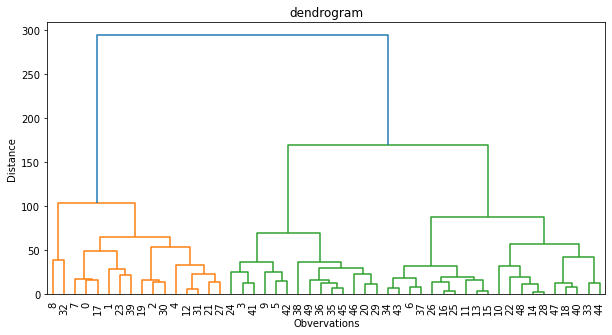

In [9]:
plt.figure(figsize = (10,5))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

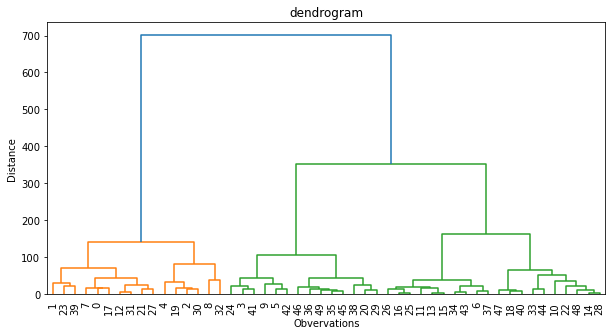

In [10]:
plt.figure(figsize = (10,5))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
cluster = AgglomerativeClustering(n_clusters = 2,affinity='euclidean',linkage='ward')
cluster.fit_predict(df)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [31]:
print(cluster.labels_)

[1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]


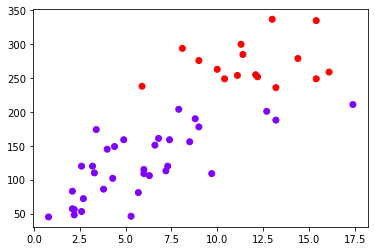

In [32]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cluster.labels_,cmap="rainbow")

In [33]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [34]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.576270501827592
